In [26]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

# todo add StaticArrays, PyPlot

  Activating environment at `~/lecture-notebooks/Lecture 2/Project.toml`


In [27]:
using LinearAlgebra
using PyPlot

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/dnoursi/.julia/packages/PyCall/BD546/src/PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/dnoursi/.julia/packages/Conda/sNGum/src/Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/dnoursi/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       hb1e8313_2         398 KB
    cycler-0.10.0              |   py39hecd8cb5_0          16 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.10.4            |       ha233b18_0         564 KB
    jpeg-9b                    |       he5867d9_2         201 KB
    kiwisolver-1.3.1           |   py39h23ab428_0          53 KB
    lcms2-2.12                 |       hf1fd2bf_0         284 KB
    libpng-1.6.37              |       ha441bb4_0         262 KB
    libtiff-4.2.0              |       h87d7836_0         462 KB
    libwebp-base-1.2.0         |       h9ed2024_0         389 KB
    lz4-c-1.9.3                |       h23ab42

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/dnoursi/.julia/packages/PyPlot/XHEG0/src/init.jl:118
┌ Info: Installing PyQt5 via the Conda pyqt package...
└ @ PyCall /Users/dnoursi/.julia/packages/PyCall/BD546/src/PyCall.jl:711
┌ Info: Running `conda install -y pyqt` in root environment
└ @ Conda /Users/dnoursi/.julia/packages/Conda/sNGum/src/Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/dnoursi/.julia/conda/3

  added / updated specs:
    - pyqt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icu-58.2                   |       h0a44026_3        10.1 MB
    pyqt-5.9.2                 |   py39h23ab428_6         3.7 MB
    qt-5.9.7                   |       h468cd18_1        62.0 MB
    sip-4.19.13                |   py39h23ab428_0         243 KB
    ------------------------------------------------------------
                                           Total:        76.1 MB

The following NEW packages will be INSTALLED:

  icu                pkgs/main/osx-64::icu-58.2-h0a44026_3
  pyqt               pkgs/main/osx-64::pyqt-5.9.2-py39h23ab428_6
  qt                 pkgs/main/osx-64::qt-5.9.7-h468cd18_1
  sip                pkgs/main/osx-64::sip-4.19.13-py39h23ab428_0



sip-4.19.13 

In [28]:
ℓ = 1.0
m = 1.0
g = 9.81 
function f(x) :: Vector{Float64}
    #pendulum dynamics
    
    θ = x[1]
    θ̇ = x[2]
    
    ẋ = [θ̇; -(g/ℓ)*sin(θ)]
end 

f (generic function with 1 method)

In [29]:
function euler_step(xk) :: Vector{Float64}
    xn = xk + h*f(xk)
end

euler_step (generic function with 1 method)

In [30]:
function simulate!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= euler_step(xtraj[:,k])
    end
end

simulate! (generic function with 1 method)

In [57]:
Tf = 1.0
h = 0.01 #20 Hz
N = Int(floor(Tf./h + 1))
thist = h.*Array(0:(N-1));

print(typeof(Tf),typeof(h),typeof(N),typeof(thist))



Float64Float64Int64Vector{Float64}

In [62]:
x0 = [50*(pi/180); 0.0]
xtraj = zeros(2,N)
xtraj[:,1] = x0;

print(typeof(x0),typeof(xtraj),typeof(xtraj[:,1]))

print(xtraj, N)
print(xtraj[:, 1])

Vector{Float64}Matrix{Float64}Vector{Float64}[0.8726646259971648 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]101[0.8726646259971648, 0.0]

In [59]:
simulate!(xtraj, N)
print(xtraj)

[0.8726646259971648 0.8726646259971648 0.871913136398465 0.8704101572010656 0.8681561624874057 0.8651521016944737 0.8613994018534558 0.8568999707827177 0.8516562012112435 0.8456709758009866 0.8389476730279289 0.8314901738730088 0.8233028692654831 0.8143906682127653 0.8047590065423473 0.794413856173115 0.7833617348252363 0.7716097160699009 0.7591654396125636 0.7460371216960666 0.7322335655031558 0.7177641714315391 0.702638947108862 0.6868685170098623 0.6704641315336429 0.6534376753955364 0.6358016751855536 0.6175693059440035 0.5987543966046415 0.5793714341567511 0.5594355663799742 0.53896260300956 0.5179690151950702 0.49647193312251137 0.4744891416784016 0.45203907404443106 0.42914080312313996 0.4058140307083808 0.38207907432919497 0.357956851712032 0.3334688628238578 0.3086371694774907 0.2834843725003025 0.2580335864880211 0.23230841218655313 0.20633290656625786 0.18013155067468328 0.15372921537514259 0.12715112509937035 0.10042281976256237 0.07357011500807292 0.046619060966635775 0.01

In [52]:
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo

vis = Visualizer()
TrajOptPlots.set_mesh!(vis, RobotZoo.Pendulum())

print(typeof(vis), typeof(RobotZoo.Pendulum))


render(vis)



VisualizerUnionAll

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8708
└ @ MeshCat /Users/dnoursi/.julia/packages/MeshCat/GlCMx/src/visualizer.jl:73


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geom" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("rod" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x74, 0x2f, 0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x72, 0x6f, 0x64], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "hinge" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x68, 0x69, 0x6e, 0x67, 0x65], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "mass" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x2f, 0x67, 0x65, 0x6f, 0x6d, 0x2f, 0x6d, 0x61, 0x73, 0x73], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))))), Set{Any}(), ip"127.0.0.1", 8708))

In [53]:
X1 = [SVector{2}(x) for x in eachcol(xtraj)];

print(typeof(X1), typeof(thist), typeof(thist[end]))
visualize!(vis, RobotZoo.Pendulum(), thist[end], X1)

Vector{SVector{2, Float64}}Vector{Float64}Float64

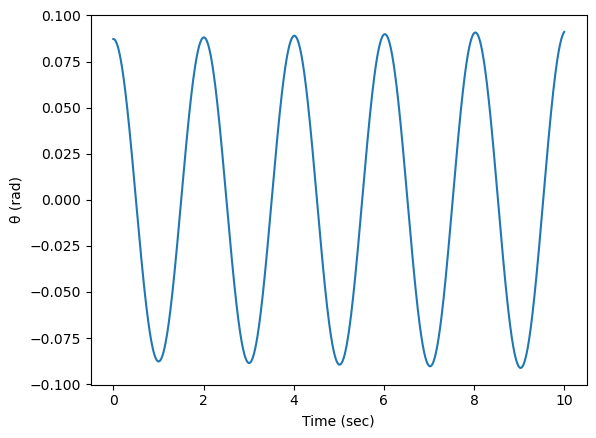

PyObject Text(24.0, 0.5, 'θ (rad)')

In [37]:
plot(thist,xtraj[1,:])
xlabel("Time (sec)")
ylabel("θ (rad)")

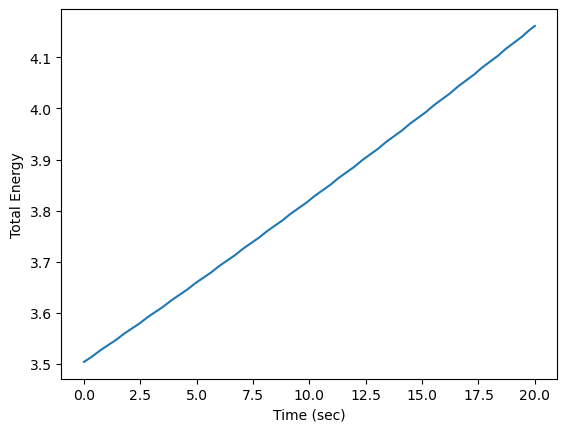

Vector{Float64}

PyObject Text(24.000000000000007, 0.5, 'Total Energy')

In [54]:
#Let's plot the total energy of the system
Ehist = 0.5*m*ℓ^2*(xtraj[2,:].^2) .+ m*g*ℓ*(1.0.-cos.(xtraj[1,:]))

print(typeof(Ehist))
plot(thist,Ehist)
xlabel("Time (sec)")
ylabel("Total Energy")